
# Exercises XP - Diabetes Classification

## What you will learn
- Understanding the problem
- Data collection
- Model training for classification
- Model evaluation

## What you will create
- A Logistic Regression model to predict diabetes



## Exercise 1 - Understanding the problem and Data Collection

We want to predict if an individual has diabetes.

- Load the diabetes dataset and explore it
- Count positive and negative cases
- Split the data into train and test


In [1]:

# TODO: load the dataset
# If running on Colab, upload the zip or csv then adjust the path
import pandas as pd
df= pd.read_csv("diabetes_prediction_dataset.csv")

print(df.shape)
display(df.head())
print(df.dtypes)
print("Missing per column:")
display(df.isna().sum().sort_values(ascending=False))


(100000, 9)


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object
Missing per column:


gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [3]:
# Assume target column is named 'diabetes' with 0 or 1 values
assert 'diabetes' in df.columns, "Expected a 'diabetes' target column"
print(df['diabetes'].value_counts())


diabetes
0    91500
1     8500
Name: count, dtype: int64


In [9]:
print(f"Ratio classes: {df['diabetes'].value_counts()[0] / df['diabetes'].value_counts()[1]:.2f} --> embalanced data")

Ratio classes: 10.76 --> embalanced data


In [11]:

# TODO: train test split
from sklearn.model_selection import train_test_split
X = df.drop(columns=['diabetes'])
y = df['diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(80000, 8) (20000, 8)



## Exercise 2 - Model picking and standardization

- Which model can we use and why
- Do we need to standardize
- If yes, apply StandardScaler



> TODO: In a short paragraph, justify Logistic Regression for this binary task. Mention linear decision boundary, calibrated probabilities, and interpretability. Explain why standardization helps for numerical stability and better conditioning.


> #### For this binary classification task, Logistic Regression is a strong choice because it models a linear decision boundary between the two classes, provides calibrated probability estimates that are useful for risk assessment, and remains highly interpretable, allowing us to understand the impact of each feature on the prediction.
 

> #### Since Logistic Regression relies on numerical optimization, standardization of features using  is important: it ensures that all variables are on the same scale, improves numerical stability, and leads to better-conditioned optimization problems, ultimately resulting in faster convergence and more reliable coefficients.

In [23]:
# TODO: build a preprocessing pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

cat_cols = X.select_dtypes(include=['object']).columns.tolist()
num_cols = X.select_dtypes(include=['int64','float64']).columns.tolist()

preprocess = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols),
    ('num', StandardScaler(), num_cols)
])
print("Categorical:", cat_cols)
print("Numeric:", num_cols)


Categorical: ['gender', 'smoking_history']
Numeric: ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level']


## Exercise 3 - Model training

In [30]:

# TODO: train Logistic Regression
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

clf = Pipeline([
    ('preprocess', preprocess),   
    ('logreg', LogisticRegression(max_iter=1000, random_state=42))
])

clf.fit(X_train, y_train)

print("Train accuracy:", clf.score(X_train, y_train))
print("Test accuracy:", clf.score(X_test, y_test))

Train accuracy: 0.9607125
Test accuracy: 0.95895



## Exercise 4 - Evaluation metrics

- Plot accuracy and comment
- Plot confusion matrix and comment
- Plot precision, recall, F1 and comment


Accuracy: 0.9589
Precision: 0.8632
Recall: 0.6171
F1: 0.7197


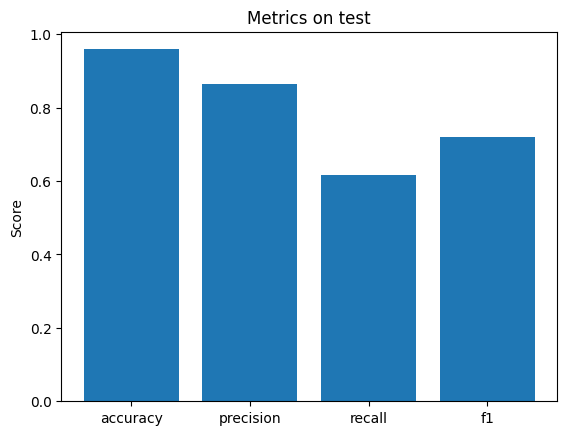

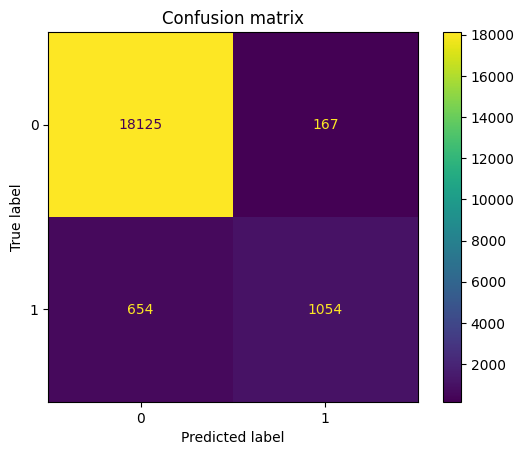

In [32]:
# TODO: use the metrics functions properly to plot the scores
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", round(acc,4))
print("Precision:", round(prec,4))
print("Recall:", round(rec,4))
print("F1:", round(f1,4))

# Simple bar plot of metrics
import matplotlib.pyplot as plt
plt.figure()
plt.bar(['accuracy','precision','recall','f1'], [acc,prec,rec,f1])
plt.title('Metrics on test')
plt.ylabel('Score')
plt.show()

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.title('Confusion matrix')
plt.show()


#### Accuracy = 0.9589
#####  Le modèle est globalement correct dans~96% des cas. Mai: avec des données déséquilibrées, l’accuracy peut être trompeus, le F1 score est plus signficative dans ce cas.

 
#### Precision = 0.8632
 ##### Quand le modèle prédit "diabète", il a raison ~86% du temps. Peu de faux positifs.

#### Recall = 0.6171
##### Le modèle détecte seulement ~62% des vrais cas de diabète. Cela signifie qu’il rate encore beaucoup de patients diabétiques (faux négatifs).

#### F1 = 0.7197
##### Score équilibré entre précision et rappel. ça montre qu’il y a une marge d’amélioration, surtout sur le rappel.

### Commentaire de matrice de confusion
> La matrice de confusion montre que le modèle prédit correctement la majorité des cas non diabétiques (18 125 vrais négatifs) avec peu de faux positifs (167), mais il échoue à détecter près de 40% des cas de diabète (654 faux négatifs). Malgré une précision élevée (86%), le rappel reste limité (62%), ce qui signifie que de nombreux patients diabétiques ne sont pas identifiés. Ce déséquilibre indique que le modèle est fiable pour exclure le diabète, mais insuffisant pour le détecter efficacement, ce qui peut être risqué dans un contexte médical.

> TODO: comment on the balance between precision and recall.

> #### Dans ton modèle, la précision est élevée (≈ 86%) tandis que le rappel est plus faible (≈ 62%). Cela signifie que lorsqu’il prédit un cas de diabète, il se trompe rarement (peu de faux positifs), mais il rate encore beaucoup de vrais cas (faux négatifs). L’équilibre est donc biaisé en faveur de la précision : le modèle privilégie la fiabilité des prédictions positives plutôt que la couverture complète des cas réels. Dans un contexte médical, ce déséquilibre est critique, car il vaut mieux améliorer le rappel pour détecter davantage de patients diabétiques, même si cela réduit légèrement la précision.



## Exercise 5 - Visualizing the performance of our model

Visualize a 2D decision boundary with accuracy info. Use only two informative features for this plot to keep it 2D. Suggested pair: `HbA1c_level` and `blood_glucose_level` if present. Otherwise pick any two numeric features.


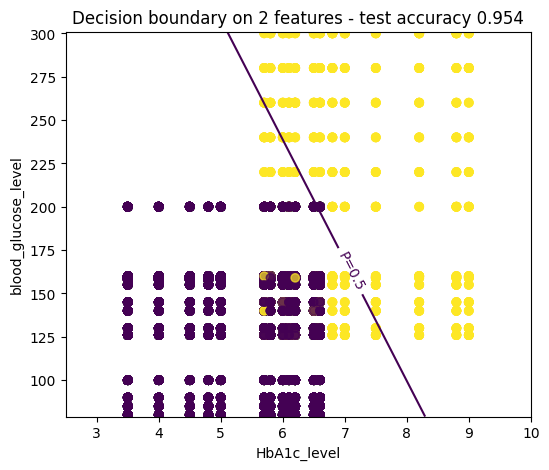

In [51]:
# TODO: If these columns do not exist, change `feat_x` and `feat_y` below to two numeric features that exist in your data.
import numpy as np
import matplotlib.pyplot as plt

feat_x = 'HbA1c_level' if 'HbA1c_level' in X.columns else X.select_dtypes(include=['int64','float64']).columns[0]
feat_y = 'blood_glucose_level' if 'blood_glucose_level' in X.columns else X.select_dtypes(include=['int64','float64']).columns[1]

X2_train = X_train[[feat_x, feat_y]].copy()
X2_test = X_test[[feat_x, feat_y]].copy()

pipe2 = Pipeline([
    ('pre', ColumnTransformer([('num', StandardScaler(), [0,1])], remainder='drop')),
    ('lr', LogisticRegression(max_iter=1000, random_state=42))
])
pipe2.fit(X2_train.values, y_train)

# Mesh
x_min, x_max = X2_train[feat_x].min()-1, X2_train[feat_x].max()+1
y_min, y_max = X2_train[feat_y].min()-1, X2_train[feat_y].max()+1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))
probs = pipe2.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1].reshape(xx.shape)

plt.figure(figsize=(6,5))
cs = plt.contour(xx, yy, probs, levels=[0.5])
plt.clabel(cs, inline=True, fmt={0.5:'P=0.5'})
plt.scatter(X2_test[feat_x], X2_test[feat_y], c=y_test, alpha=0.7)
plt.xlabel(feat_x); plt.ylabel(feat_y)
from sklearn.metrics import accuracy_score
acc2 = accuracy_score(y_test, pipe2.predict(X2_test.values))
plt.title(f'Decision boundary on 2 features - test accuracy {acc2:.3f}')
plt.show()


-->  ce plot montre comment le modèle sépare les classes visuellement dans un espace réduit (2 features), ce qui aide à comprendre son comportement.



## Exercise 6 - ROC curve

Use the code template provided to plot the ROC curve for your model and compute AUC. You can reuse the fitted `clf` pipeline.

Template summary:
- Get predicted probabilities for the positive class
- Compute fpr and tpr with `roc_curve`
- Plot ROC and print AUC


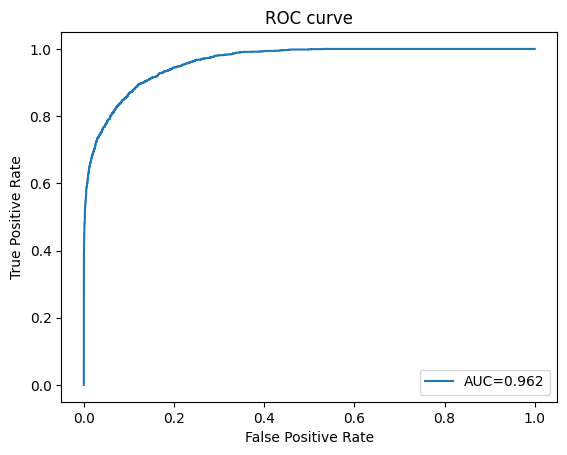

In [53]:

from sklearn import metrics
y_proba = clf.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_proba)
auc = metrics.roc_auc_score(y_test, y_proba)

plt.figure()
plt.plot(fpr, tpr, label=f'AUC={auc:.3f}')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.title('ROC curve')
plt.show()


--> ce plot (ROC) montre statistiquement la capacité du modèle à distinguer les classes sur l’ensemble des features, en faisant varier le seuil de décision.

> TODO: interpret the ROC curve and AUC from results of execution of cell above.

Ce que mesure l’AUC:
- L’AUC (Area Under the ROC Curve) ne se limite pas au seuil 0.5.  
- Il évalue la capacité du modèle à séparer les classes sur tous les seuils possibles.  
- Concrètement, il répond à la question : *si je prends un patient diabétique et un patient non diabétique au hasard, quelle est la probabilité que le modèle attribue une probabilité plus élevée au diabétique ?*



### L’AUC élevé  dit que le modèle a l’information nécessaire pour bien distinguer les classes, donc 	Le rappel bas vient uniquement du choix du seui, et c'est normale puisque nous travaillons avec des données désiquilibrés..